In [1]:
import pandas as pd
import matplotlib.pyplot as plt

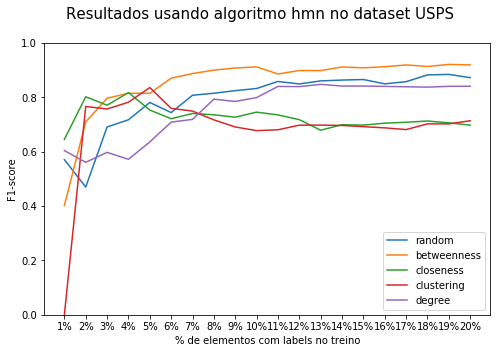

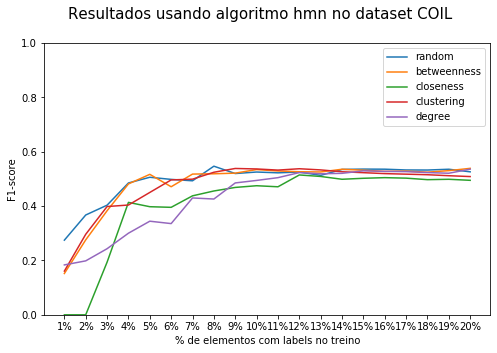

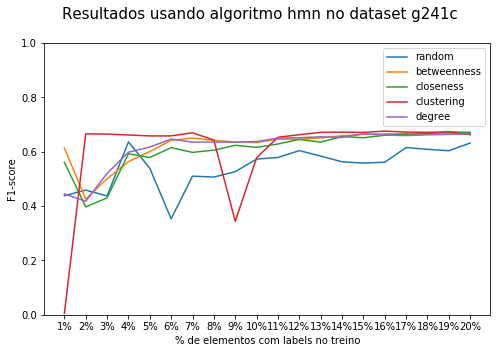

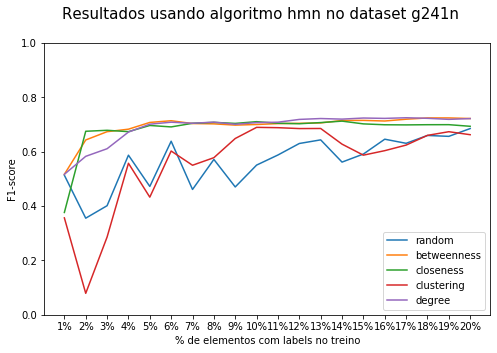

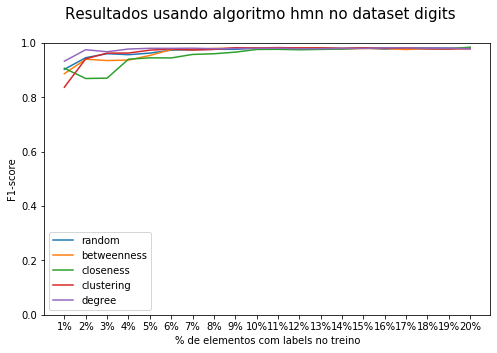

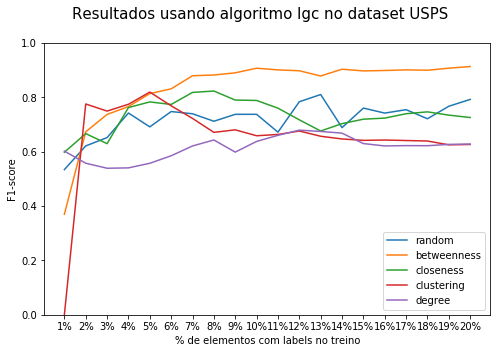

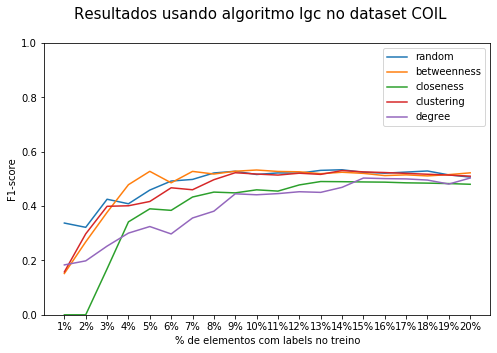

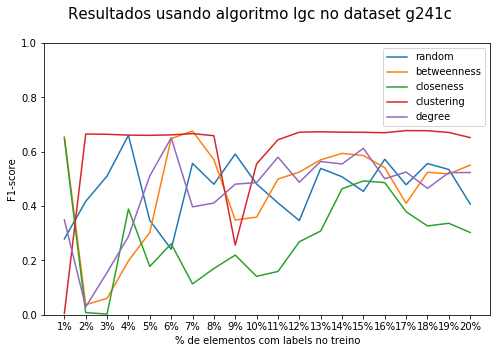

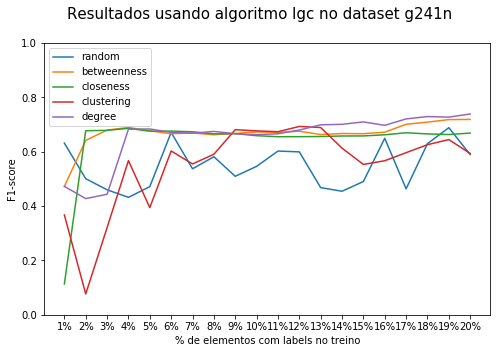

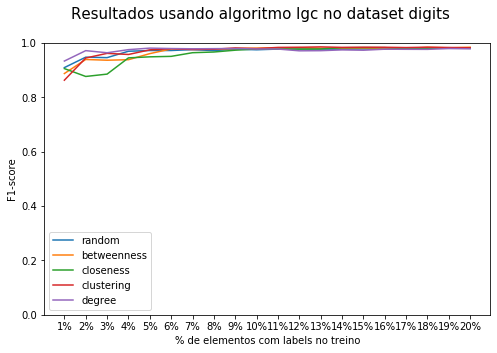

In [3]:
for model in ['hmn', 'lgc']:
    for dataset in ['USPS','COIL','g241c','g241n','digits']:
        reader = pd.read_csv('results2/csv/'+model+'_'+dataset+'_scores.csv')
        reader =reader.set_index('centrality').head()

        fig = plt.figure(figsize=(8, 5))
        plt.ylim(0,1)

        fig.suptitle('Resultados usando algoritmo '+model+' no dataset '+dataset, fontsize=15)
        plt.xlabel('% de elementos com labels no treino', fontsize=10)
        plt.ylabel('F1-score', fontsize=10)
        
        plt.plot(reader[reader.index == 'random'].columns.to_list(), 
                 reader[reader.index == 'random'].values[0],
                 label = 'random')
        plt.plot(reader[reader.index == 'betweenness'].columns.to_list(), 
                 reader[reader.index == 'betweenness'].values[0],
                 label = 'betweenness')
        plt.plot(reader[reader.index == 'closeness'].columns.to_list(), 
                 reader[reader.index == 'closeness'].values[0],
                 label = 'closeness')
        plt.plot(reader[reader.index == 'clustering'].columns.to_list(), 
                 reader[reader.index == 'clustering'].values[0],
                 label = 'clustering')
        plt.plot(reader[reader.index == 'degree'].columns.to_list(), 
                 reader[reader.index == 'degree'].values[0],
                 label = 'degree')
        plt.legend()
        fig.savefig('results2/score/'+model+'_'+dataset+'_graphic.png')

In [38]:
reader.head()

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,11%,12%,13%,14%,15%,16%,17%,18%,19%,20%
centrality,,,,,,,,,,,,,,,,,,,,
degree,0.933596,0.971871,0.964080,0.975575,0.981187,0.979592,0.978692,0.979198,0.979684,0.978014,0.977778,0.971251,0.971743,0.974643,0.973409,0.977236,0.976860,0.976589,0.978831,0.977740
closeness,0.905875,0.876730,0.883660,0.945274,0.951273,0.953010,0.964286,0.966089,0.970522,0.976639,0.979436,0.979118,0.978923,0.982567,0.983133,0.982143,0.981878,0.980817,0.980623,0.979730
betweenness,0.885177,0.934768,0.936027,0.940518,0.958631,0.977356,0.980854,0.978566,0.982772,0.983333,0.983784,0.984448,0.980392,0.983294,0.985484,0.984439,0.981788,0.983250,0.982964,0.982759
clustering,0.863142,0.944767,0.961898,0.957787,0.974838,0.978848,0.975717,0.976261,0.982694,0.978659,0.983759,0.984301,0.984909,0.983845,0.984490,0.984285,0.983221,0.984589,0.982639,0.981563
random,0.936706,0.934610,0.961006,0.963529,0.975293,0.967652,0.975234,0.969233,0.979506,0.979324,0.976960,0.979736,0.977105,0.977955,0.982549,0.980968,0.981939,0.982129,0.978127,0.984884


In [40]:
reader.groupby('centrality').agg('count').index

Index(['betweenness', 'closeness', 'clustering', 'degree', 'random'], dtype='object', name='centrality')

In [3]:
import pandas as pd
import seaborn as sns

['1', '0']

In [58]:
df.columns = ['centrality', 'percentage', '1', '0']
df.head()

,centrality,percentage,1,0
0,degree,0.01,7.0,8.0
1,degree,0.02,12.0,18.0
2,degree,0.03,20.0,25.0
3,degree,0.04,28.0,32.0
4,degree,0.05,37.0,38.0


hmn USPS degree
hmn USPS closeness
hmn USPS betweenness
hmn USPS clustering
hmn USPS random
hmn COIL degree
hmn COIL closeness
hmn COIL betweenness
hmn COIL clustering
hmn COIL random
hmn g241c degree
hmn g241c closeness
hmn g241c betweenness
hmn g241c clustering
hmn g241c random
hmn g241n degree
hmn g241n closeness
hmn g241n betweenness
hmn g241n clustering
hmn g241n random
hmn digits degree
hmn digits closeness


/home/thiagosato/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


hmn digits betweenness
hmn digits clustering
hmn digits random
lgc USPS degree
lgc USPS closeness
lgc USPS betweenness
lgc USPS clustering
lgc USPS random
lgc COIL degree
lgc COIL closeness
lgc COIL betweenness
lgc COIL clustering
lgc COIL random
lgc g241c degree
lgc g241c closeness
lgc g241c betweenness
lgc g241c clustering
lgc g241c random
lgc g241n degree
lgc g241n closeness
lgc g241n betweenness
lgc g241n clustering
lgc g241n random
lgc digits degree
lgc digits closeness
lgc digits betweenness
lgc digits clustering
lgc digits random


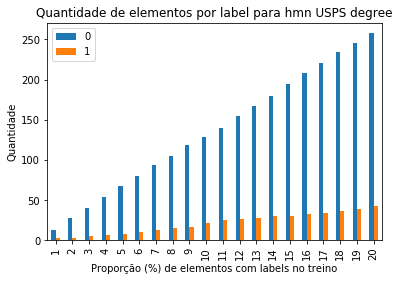

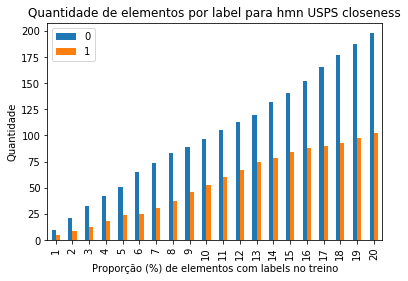

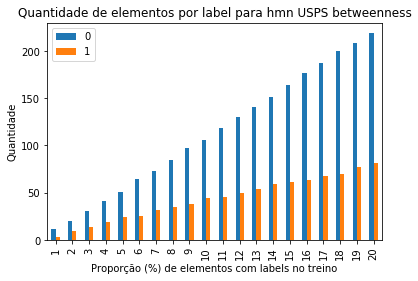

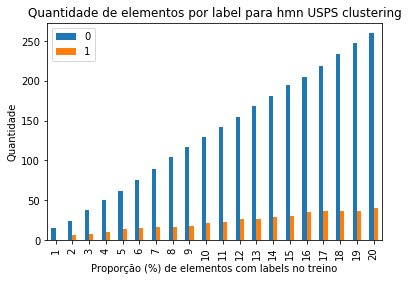

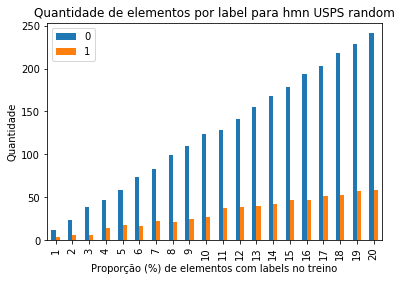

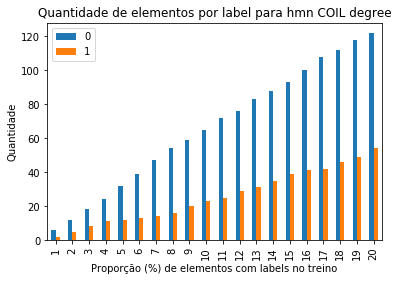

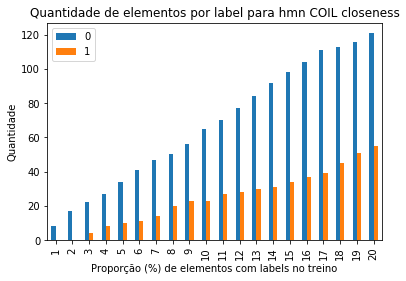

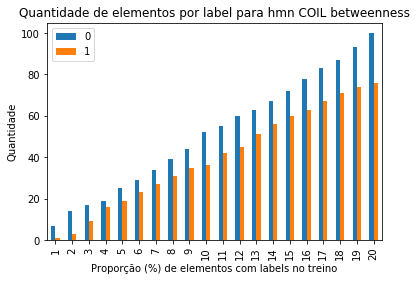

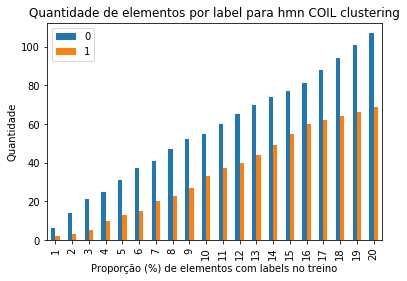

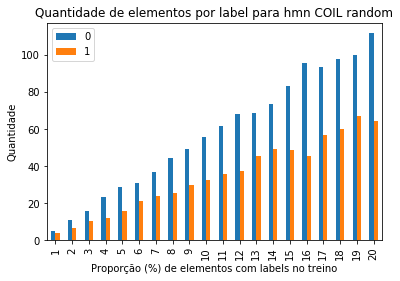

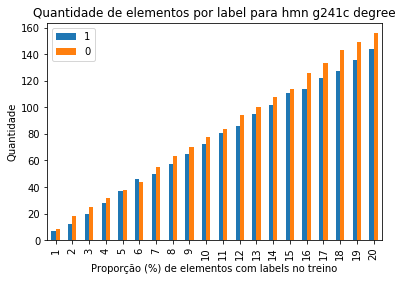

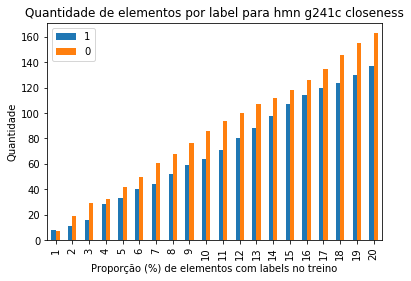

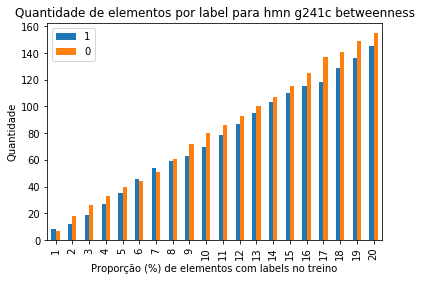

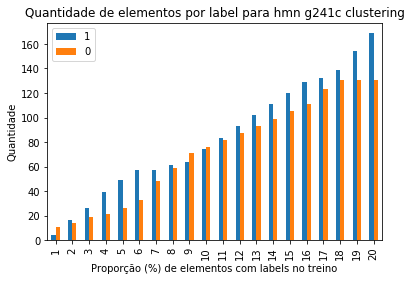

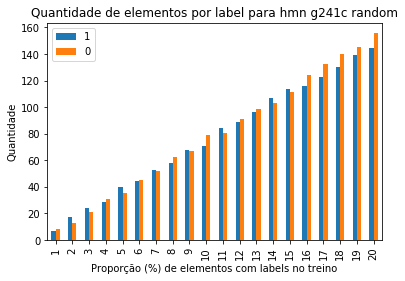

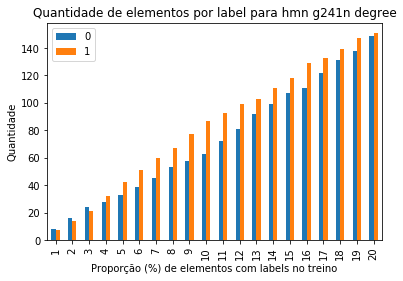

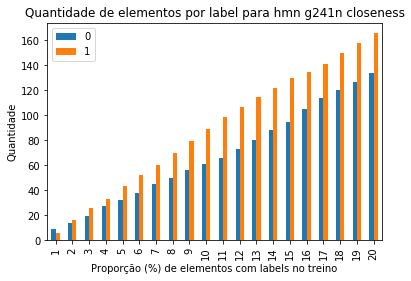

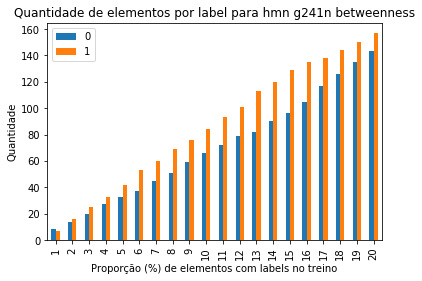

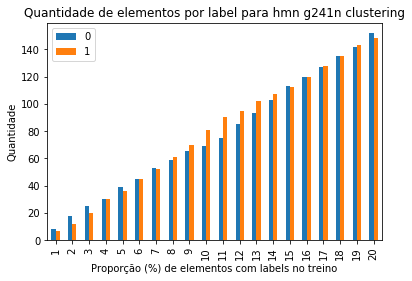

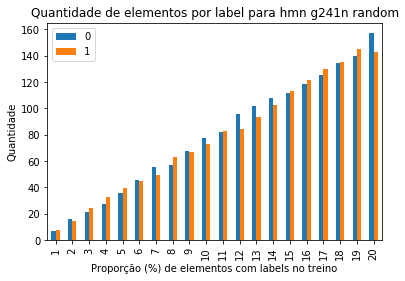

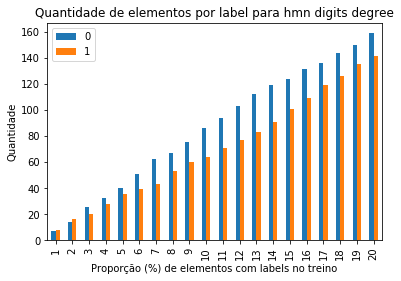

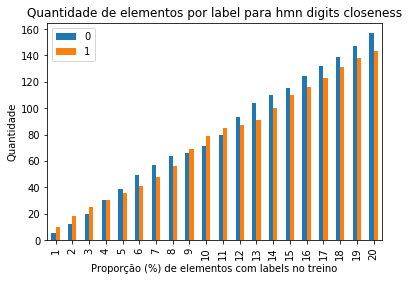

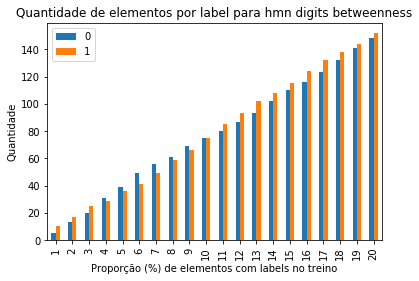

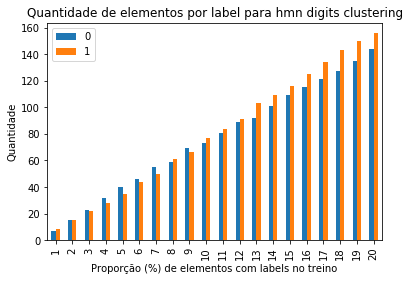

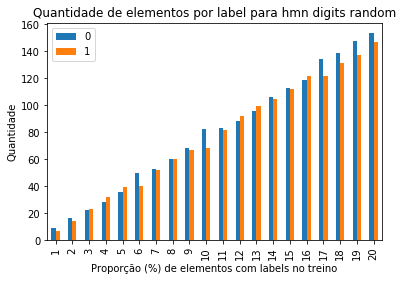

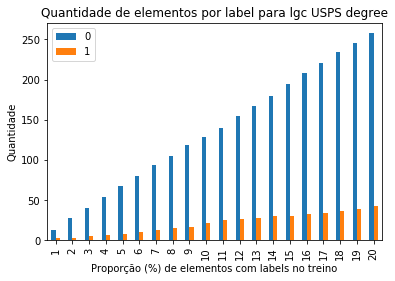

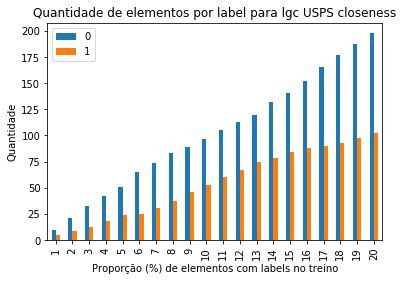

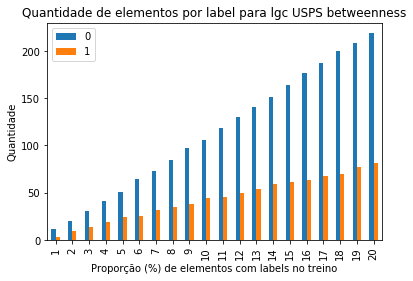

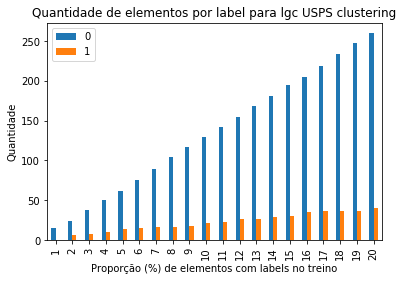

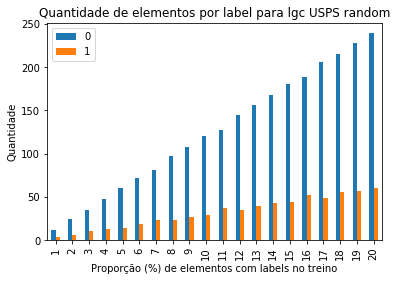

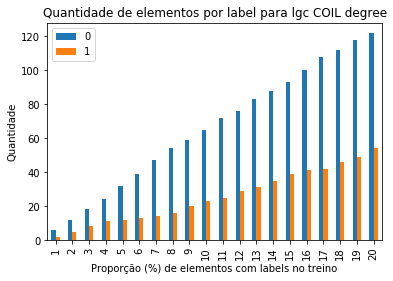

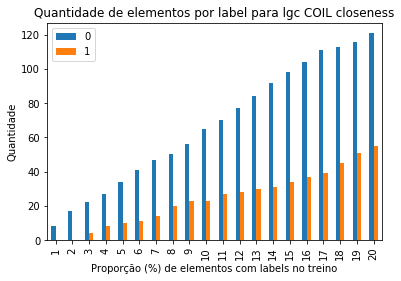

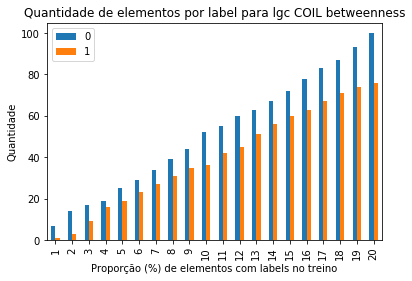

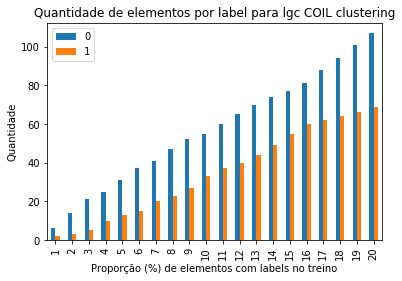

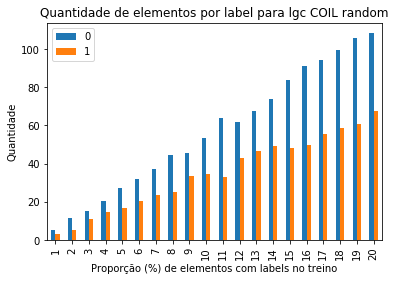

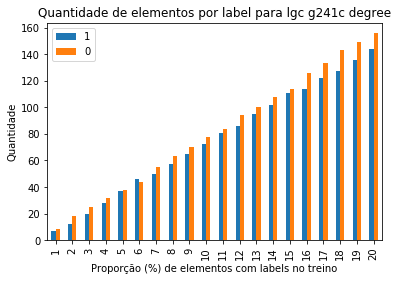

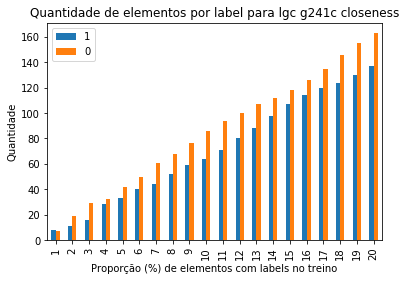

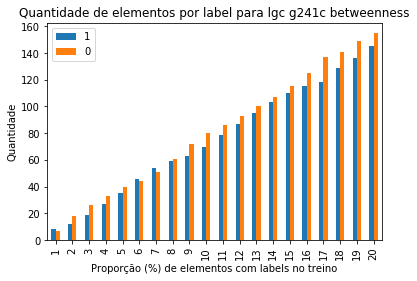

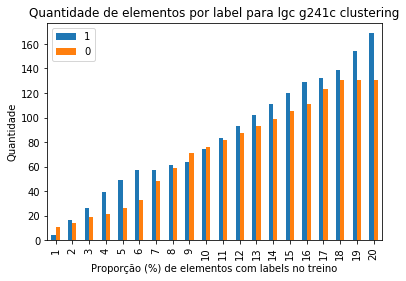

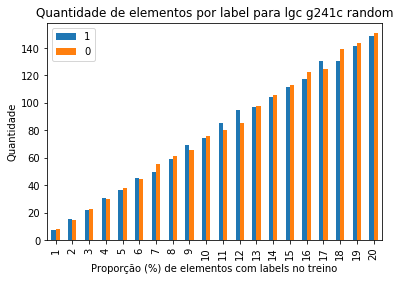

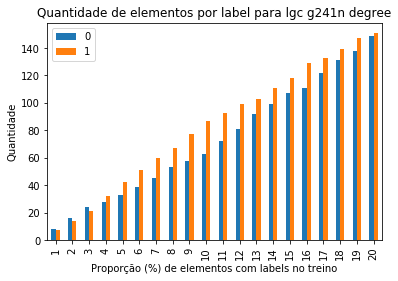

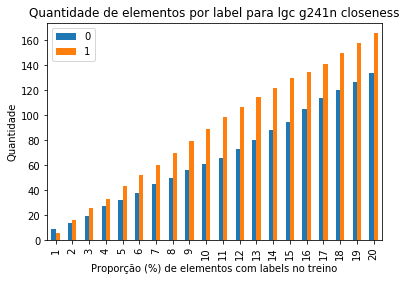

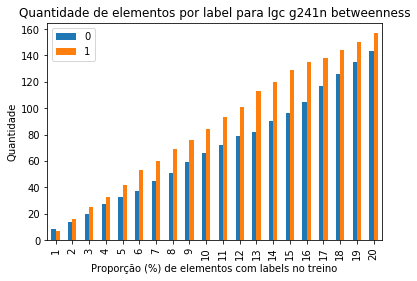

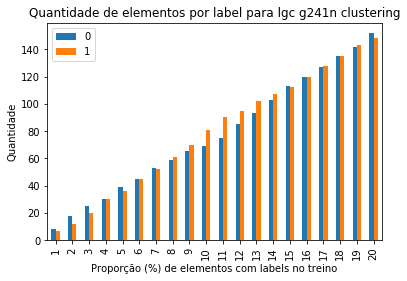

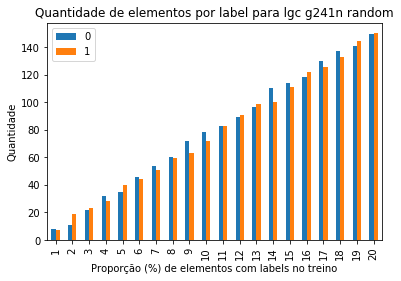

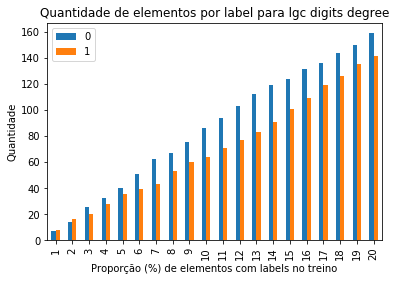

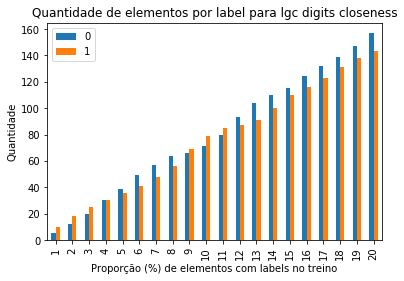

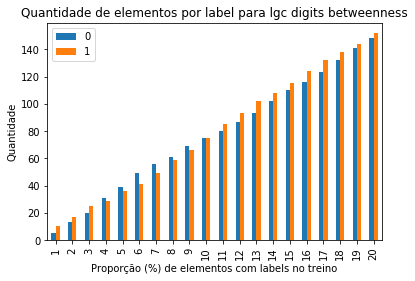

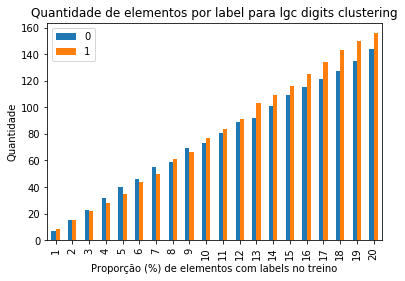

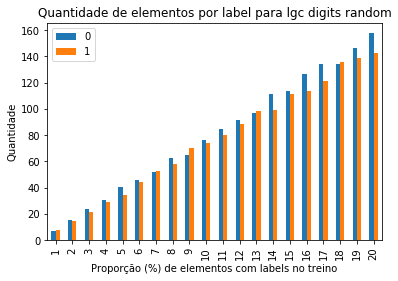

In [4]:
for model in ['hmn', 'lgc']:
    for dataset in ['USPS','COIL','g241c','g241n','digits']:
        df = pd.read_csv('results3/csv/'+'count_labels_'+model+'_'+dataset+'_scores.csv')
        df.percentage = 100*df.percentage
        df = df.astype({'percentage': 'int64'})
        for metric in ['degree','closeness','betweenness', 'clustering','random']:
            print(model+' '+dataset+' '+metric)
            df.loc[df.centrality==metric].plot(x="percentage",
                                             y=[df.columns[2],df.columns[3]], 
                                             kind="bar", 
                                             title='Quantidade de elementos por label para '+model+' '+dataset+' '+metric)
            plt.xlabel('Proporção (%) de elementos com labels no treino', fontsize=10)
            plt.ylabel('Quantidade', fontsize=10)
            plt.savefig('results3/labels/'+model+'_'+dataset+'_'+metric+'_barplot.png')